# Enunciado:

Cada persona tiene un gusto diferente en la música. No podemos identificar qué tipo de música le gusta a una persona simplemente conociendo su estilo de vida, pasatiempos o profesión. Por lo tanto, es difícil que las aplicaciones de transmisión de música recomienden música a una persona. Pero si sabemos qué tipo de canciones escucha una persona a diario, podemos encontrar similitudes en todos los archivos de música y recomendar música similar a la persona.

Ahí es donde entra en juego el análisis de conglomerados de géneros musicales. Aquí se os proporciona un conjunto de datos de canciones populares en Spotify, que contiene artistas y nombres de música con todas las características de audio de cada música. Su objetivo es agrupar géneros musicales en función de las similitudes en sus características de audio.

In [74]:
import pandas as pd
import numpy as np

df = pd.read_csv('csv/Spotify-2000.csv')
df.head()

,Index,Title,Artist,Top Genre,Year,Beats Per Minute (BPM),Energy,Danceability,Loudness (dB),Liveness,Valence,Length (Duration),Acousticness,Speechiness,Popularity
0,1,Sunrise,Norah Jones,adult standards,2004,157,30,53,-14,11,68,201,94,3,71
1,2,Black Night,Deep Purple,album rock,2000,135,79,50,-11,17,81,207,17,7,39
2,3,Clint Eastwood,Gorillaz,alternative hip hop,2001,168,69,66,-9,7,52,341,2,17,69
3,4,The Pretender,Foo Fighters,alternative metal,2007,173,96,43,-4,3,37,269,0,4,76
4,5,Waitin' On A Sunny Day,Bruce Springsteen,classic rock,2002,106,82,58,-5,10,87,256,1,3,59


In [75]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1994 entries, 0 to 1993
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Index                   1994 non-null   int64 
 1   Title                   1994 non-null   object
 2   Artist                  1994 non-null   object
 3   Top Genre               1994 non-null   object
 4   Year                    1994 non-null   int64 
 5   Beats Per Minute (BPM)  1994 non-null   int64 
 6   Energy                  1994 non-null   int64 
 7   Danceability            1994 non-null   int64 
 8   Loudness (dB)           1994 non-null   int64 
 9   Liveness                1994 non-null   int64 
 10  Valence                 1994 non-null   int64 
 11  Length (Duration)       1994 non-null   object
 12  Acousticness            1994 non-null   int64 
 13  Speechiness             1994 non-null   int64 
 14  Popularity              1994 non-null   int64 
dtypes: i

In [76]:
X = df.drop(['Index','Title'], axis=1) # Eliminamos las columnas que no nos interesan

In [77]:
# Comprobamos si hay valores nulos
X.isnull().sum()

Artist                    0
Top Genre                 0
Year                      0
Beats Per Minute (BPM)    0
Energy                    0
Danceability              0
Loudness (dB)             0
Liveness                  0
Valence                   0
Length (Duration)         0
Acousticness              0
Speechiness               0
Popularity                0
dtype: int64

In [78]:
# Convertimos las columnas de artistas y géneros a variables numéricas
from sklearn.preprocessing import OrdinalEncoder

encoder = OrdinalEncoder()

X['Artist'] = encoder.fit_transform(X[['Artist']]) # Necesitamos pasarle un DataFrame y no una Serie
X['Top Genre'] = encoder.fit_transform(X[['Top Genre']])

for columna in X.columns:
    if X[columna].dtype == 'object':
        X[columna] = X[columna].str.replace(',', '.')
"""
Esto hace que las columnas que son de tipo object se conviertan a tipo float64
"""

# Eliminamos los espacios en blanco de las columnas
X.columns = X.columns.str.replace(' ', '')

X.head()

,Artist,TopGenre,Year,BeatsPerMinute(BPM),Energy,Danceability,Loudness(dB),Liveness,Valence,Length(Duration),Acousticness,Speechiness,Popularity
0,443.0,2.0,2004,157,30,53,-14,11,68,201,94,3,71
1,152.0,5.0,2000,135,79,50,-11,17,81,207,17,7,39
2,250.0,8.0,2001,168,69,66,-9,7,52,341,2,17,69
3,220.0,9.0,2007,173,96,43,-4,3,37,269,0,4,76
4,86.0,61.0,2002,106,82,58,-5,10,87,256,1,3,59


In [79]:
# Convertimos los datos a un array de numpy de valores flotantes
X_numpy = X.values
X_numpy = X_numpy.astype(float)

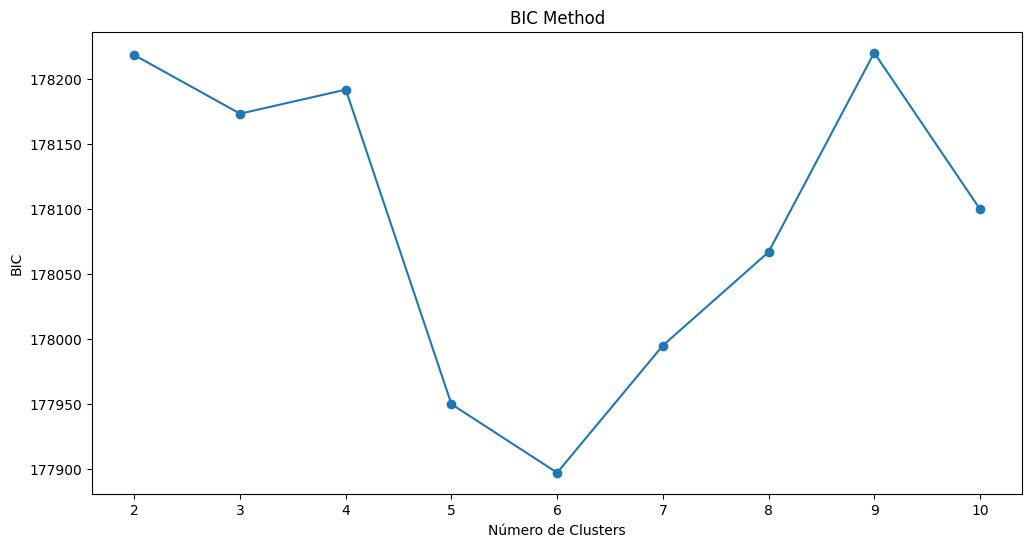

In [80]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn import metrics


def BIC(K, grupos, X):
    """
    K: Número de grupos (clusters)
    grupos: Vector que contiene los grupos de los datos
    X: Matriz de datos
    """
    N = X.shape[0]  # Número de datos
    P = X.shape[1]  # Número de variables
    xi = np.zeros((1, K))  # Vector xi

    # Calculamos el sumario de xi en la fórmula
    for k in range(0, K):
        suma = 0
        for j in range(0, P):
            sigma = np.square(np.std(X[:, j]))
            sigma_j = np.square(np.std(X[grupos == k, j]))
            suma += 0.5 * np.log(sigma + sigma_j)

        n_k = sum(grupos == k)  # Número de elementos en el grupo k
        xi[0, k] = -n_k * suma

    bic = -2 * np.sum(xi) + 2 * K * P * np.log(N)
    return bic


# Calcular BIC para diferentes valores de k
bic = []
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, n_init=10, random_state=42)
    grupos = kmeans.fit_predict(X_numpy)
    bic.append(BIC(k, grupos, X_numpy))

plt.figure(figsize=(12, 6))

plt.plot(range(2, 11), bic, marker='o')
plt.xlabel('Número de Clusters')
plt.ylabel('BIC')
plt.title('BIC Method')

plt.show()

In [81]:
# Calculamos el número óptimo de clusters
n_clusters = 6

In [82]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_numpy)

kmeans = KMeans(n_clusters=n_clusters, n_init=10, random_state=42)
pred = kmeans.fit_predict(X_numpy)

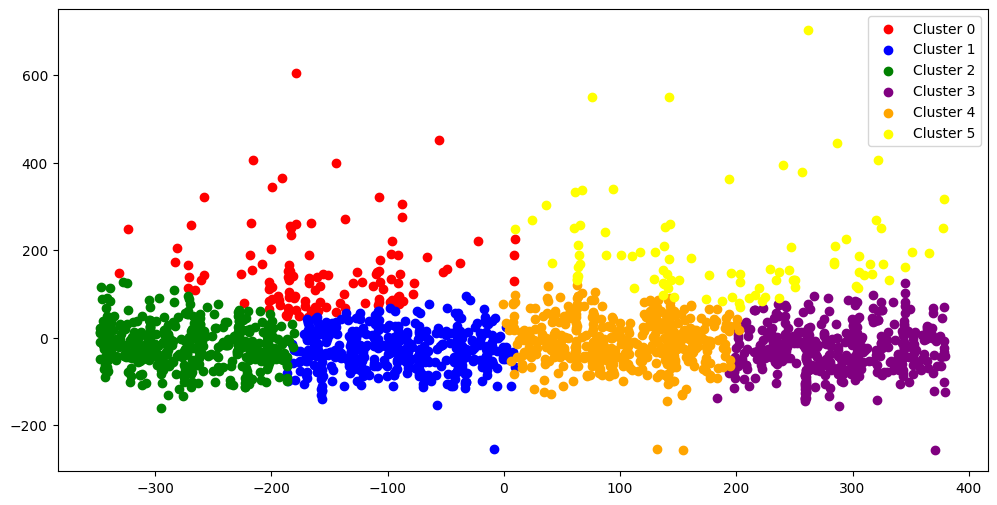

In [86]:
colors = ['red', 'blue', 'green', 'purple', 'orange', 'yellow']
plt.figure(figsize=(12, 6))
for i in range(n_clusters):
    plt.scatter(X_pca[pred == i, 0], X_pca[pred == i, 1], c=colors[i], label='Cluster ' + str(i))
plt.legend()
plt.show()